**This Notebook implements the TensorFlow tutorial which uses SoftMax Logistic Regression on the MNIST dataset**

In [62]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import time

Import MNIST Data

In [63]:
mnist = input_data.read_data_sets("../datasets/MNIST/", one_hot=True)

Extracting ../datasets/MNIST/train-images-idx3-ubyte.gz
Extracting ../datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting ../datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting ../datasets/MNIST/t10k-labels-idx1-ubyte.gz


Look at sizes of training, validation and test sets
Each image is 28 X 28 pixels
Labels are in one hot encoding for use with softmax

55000
5000
10000


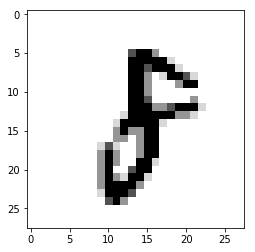

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


In [64]:
print(mnist.train.num_examples)
print(mnist.validation.num_examples)
print(mnist.test.num_examples)
plt.imshow(mnist.train.images[30].reshape(28,28),cmap="Greys")
plt.show()
print (mnist.train.labels[30])




Declare Variables

In [65]:
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))


Implement Model

In [66]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Launch Model

In [67]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

Define function that runs the model for given number of batches and returns the training time and accuracy on the validations and test data sets

In [68]:
def train_and_test_model(batches):
    start = time.time()
    for _ in range(batches):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    validation_accuracy = sess.run(accuracy, feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})
    test_accuracy = sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})
    return (time.time() - start, validation_accuracy, test_accuracy)

The tutorial runs a 1000 batches each of size 100 which is about 2 epochs with 55000 test images. Lets run the model for 1, 2 and 5 epochs and see how accuracy changes with longer training time and also record how long it takes to train.

In [69]:
one_epoch = train_and_test_model(550)
two_epoch = train_and_test_model(1100)
ten_epoch = train_and_test_model(5500)
print(one_epoch,two_epoch,ten_epoch)

(0.7923367023468018, 0.91839999, 0.91689998) (2.544255018234253, 0.92460001, 0.91900003) (6.694317102432251, 0.92760003, 0.9228)


Num Epochs | Train Time | Validation Accuracy | Test Accuracy
---------- | ---------- | ------------------- | -------------
1          | 0.7465     | 0.9262              | 0.9225
2          | 1.2224     | 0.9244              | 0.9225
10         | 5.9743     | 0.9282              | 0.9265

It looks like running the model longer, i.e. more epochs, does not improve accuracy. We probably want to run more than 1 epoch. So running 2 epochs in 1.2 seconds for training and 92% accuracy looks like the benchmark to aim for while developing a hand coded model using numpy.
